<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
# feel free to import other libraries! 

In [2]:
df = pd.read_csv('states_edu.csv')

Chosen test: 4th Grade Reading Scores

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [3]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [4]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

Final feature list: The support services expenditure divided by all of the students enrolled. 

Feature selection justification: So that variables are represented equally and not weighted by their size.

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Distribution of 4th grade reading scores')

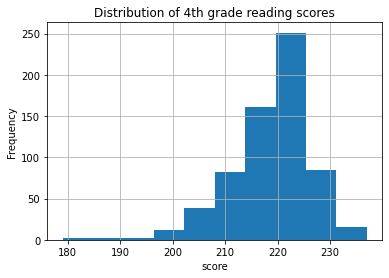

In [5]:
df.AVG_READING_4_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 4th grade reading scores')

The graph above demonstrates the distribution of 4th grade reading scores. It is slightly right skewed and it appears the most 4th grade students have around a score of 220. 

Visualization 2

<AxesSubplot:xlabel='AVG_MATH_4_SCORE', ylabel='AVG_READING_4_SCORE'>

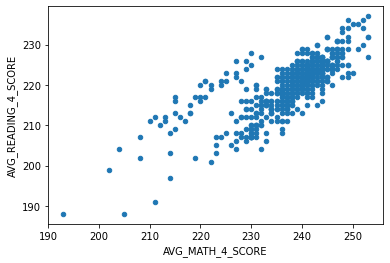

In [6]:
df.plot.scatter(x='AVG_MATH_4_SCORE',y='AVG_READING_4_SCORE')

The graph above shows the relationship between the average 4th grade reading scores and the average 4th grade math scores. The graph tells us that most students score an average of 240 on math while also scoring an average of 225 on reading. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,2.080717
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,3.838128
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,1.940807
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,2.139821
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,2.655237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0,3.954151
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0,4.149538
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0,4.187910
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0,4.254216


In [9]:
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)

In [10]:
((df.ENROLL_ALL - df.ENROLL_ALL_EST)/df.ENROLL_ALL).describe()

count    481.000000
mean       0.027597
std        0.054886
min       -0.096404
25%        0.004437
50%        0.014650
75%        0.031764
max        0.450693
dtype: float64

In [11]:
df.dropna(subset=['AVG_READING_8_SCORE'], inplace=True)

In [12]:
((df.ENROLL_ALL-df.ENROLL_PREK-df.ENROLL_KINDER-df.ENROLL_PRIMARY-df.ENROLL_HS)/df.ENROLL_ALL*100).describe()

count    433.000000
mean       0.463191
std        1.143213
min        0.000000
25%        0.000000
50%        0.000000
75%        0.224393
max        7.702014
dtype: float64

In [13]:
df.ENROLL_ALL.isna().sum()

75

In [14]:
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)

In [15]:
df[df.ENROLL_ALL_EST.isna()].ENROLL_ALL.notna().sum()

0

In [16]:
X = df[['TOTAL_REVENUE','ENROLL_4','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: REGRESSION

In [18]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [19]:
import sklearn

In [20]:
# create your model here
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'Reading 4 score')

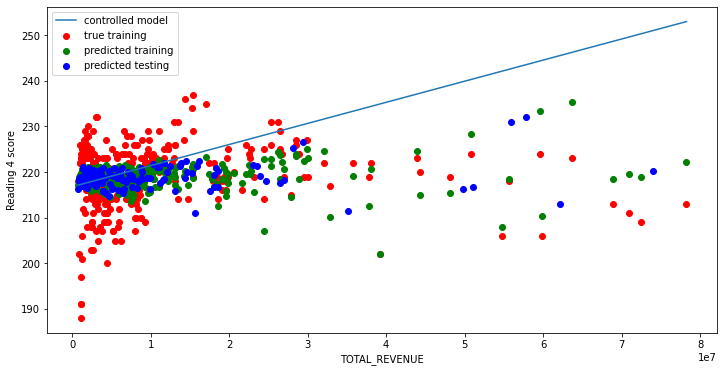

In [23]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'TOTAL_REVENUE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 score')

<h2> Summary </h2>

The graph shows the predicted path of total revenue and reading 4 score. Unfortunately, the graph is not very good at prediction since the line does not fit at all. This would tell us that the graph is not very good at prediction reading 4 score for total revenue. Other variables may have differing results, but considering how bad it is at predicting this variable, this graph is probably just bad. 